In [44]:
import statsmodels.formula.api as sm, pandas as pd
import statsmodels.api as smf
from pandas import DataFrame, read_csv
import math
import matplotlib.pyplot as plt
import pylab
get_ipython().magic(u'matplotlib inline')
from scipy.interpolate import spline
import patsy

In [3]:
def CSVtoDB(path):
	db = pd.read_csv(path)
	db.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace=True)
	return db

In [32]:
Location = 'C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\Scale_Energy_Regression.csv'
df = read_csv(Location)

In [33]:
df=df.sort('Scale')
df

C:\Users\Olga\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Scale,Energy
0,1.200,4.857940
1,1.895,6.200000
2,4.000,4.855403
3,10.000,7.286149
4,20.000,7.287671
5,20.000,4.000000
6,27.000,5.000000
7,40.000,7.287671
8,100.000,3.000000
9,100.000,1.400000


In [37]:
df2= df
df2['logScale'] = np.log(df2['Scale'])
df2['logEnergy'] = np.log(df2['Energy'])

In [41]:
energy = np.array(df2['logEnergy'])
scale = np.array(df2['logScale'])

In [48]:
X = smf.add_constant(scale)
model = smf.OLS(energy , X)
results = model.fit()

In [49]:
results.params

array([ 2.26030721, -0.30022565])

In [61]:
results.f_pvalue

2.7295550103724426e-05

In [54]:
results.t_test([1, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c0             2.2603      0.244      9.264      0.000         1.737     2.784

In [55]:
results.summary()

C:\Users\Olga\Anaconda2\lib\site-packages\scipy\stats\stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     37.24
Date:                Fri, 01 Jul 2016   Prob (F-statistic):           2.73e-05
Time:                        10:25:14   Log-Likelihood:                -10.321
No. Observations:                  16   AIC:                             24.64
Df Residuals:                      14   BIC:                             26.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.2603      0.244      9.264      0.000         1.737     2.784
x1            -0.3002      0.049     -6.103      0.000        -0.406    -0.195
==============================================================================
Omnibus:                        1.932   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.175
Skew:                           0.366   Prob(JB):                        0.556
Kurtosis:                       1.892   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
result = sm.ols('np.log(Energy)~  np.log(Scale)', data=df).fit()
print result.summary()

ValueError: For numerical factors, num_columns must be an int

In [35]:
parameters=result.params
rsquared=result.rsquared

0.43773756881466686

In [9]:
intercept_reg=parameters[0]
scale_reg=parameters[1]

In [10]:
intercept_power=math.exp(intercept_reg)

In [11]:
x=fd2['Scale'].tolist()
y = (x**scale_reg)*intercept_power
y_points=df1['Energy'].tolist()
plotd=[scale_reg,intercept_power]
plotd


[-0.1819244298743265, 7.459269065697027]

In [15]:
min=fd2['Scale'].min()
max=fd2['Scale'].max()
x_line=range(1,1000,1)
y_line = (x_line**scale_reg)*intercept_power

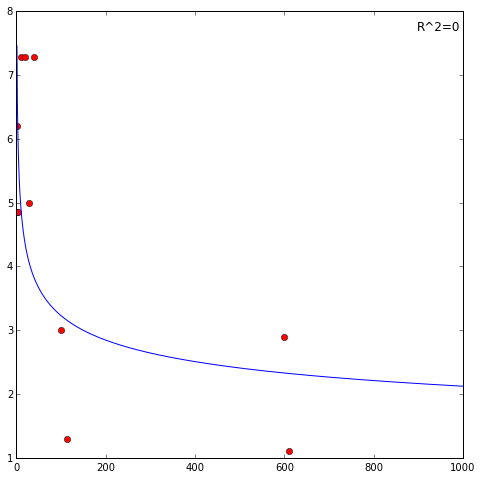

In [38]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x,y_points,'ro')
plt.hold()
plt.plot(x_line,y_line)
plt.xlim(0,1000)
plt.text(900,7.7,'R^2=%d'%float(rsquared),fontsize=12)